In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [8]:
! ls ../data/intermediate/tb_logs/tile2vec/version_1/checkpoints

tilenet-epoch=09-val_loss=51.30.ckpt


In [2]:
from birdclef.models.embedding.tilenet import TileNet

model = TileNet.load_from_checkpoint(
    "../data/intermediate/tb_logs/tile2vec/version_1/checkpoints/"
    "tilenet-epoch=09-val_loss=51.30.ckpt",
    z_dim=64,
)
model

f:\kaggle\birdclef-2022\venv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


STFT kernels created, time used = 0.1074 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
MelSpectrogram(
  Mel filter banks size = (64, 1025), trainable_mel=False
  (stft): STFT(n_fft=2048, Fourier Kernel size=(1025, 1, 2048), iSTFT=False, trainable=False)
)


TileNet(
  (spec_layer): MelSpectrogram(
    Mel filter banks size = (64, 1025), trainable_mel=False
    (stft): STFT(n_fft=2048, Fourier Kernel size=(1025, 1, 2048), iSTFT=False, trainable=False)
  )
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [3]:
import pandas as pd

df = pd.read_parquet("../data/intermediate/2022-02-26-motif-consolidated.parquet")
df

,source_name,cens_sample_rate,matrix_profile_window,motif_0,motif_1,sample_rate,duration_cens,duration_samples,duration_seconds
0,train_audio/afrsil1/XC125458.ogg,10,50,61.0,26.0,22050,113,244800,11.10
1,train_audio/afrsil1/XC175522.ogg,10,50,229.0,305.0,22050,477,1036800,47.02
2,train_audio/afrsil1/XC177993.ogg,10,50,492.0,353.0,22050,545,1185408,53.76
3,train_audio/afrsil1/XC205893.ogg,10,50,397.0,726.0,22050,1069,2325888,105.48
4,train_audio/afrsil1/XC207431.ogg,10,50,NaN,NaN,22050,35,74880,3.40
...,...,...,...,...,...,...,...,...,...
14847,train_audio/zebdov/XC629769.ogg,10,50,362.0,326.0,22050,619,1346285,61.06
14848,train_audio/zebdov/XC642415.ogg,10,50,0.0,25.0,22050,151,327575,14.86
14849,train_audio/zebdov/XC665873.ogg,10,50,397.0,365.0,22050,462,1004951,45.58
14850,train_audio/zebdov/XC666194.ogg,10,50,169.0,133.0,22050,219,475200,21.55


In [4]:
df["species"] = df.source_name.apply(lambda x: x.split("/")[1])
df[["species"]].groupby("species").size().sort_values(ascending=False)

species
brnowl     500
skylar     500
norcar     500
mallar3    500
houspa     500
          ... 
puaioh       3
layalb       3
akikik       2
crehon       2
maupar       1
Length: 152, dtype: int64

In [5]:
from birdclef.workflows import motif
from pathlib import Path

data = []
root = Path("../data/raw/birdclef-2022")
for row in df[df.species == "brnowl"].itertuples():
    y = motif._load_audio(root / row.source_name, int(row.motif_0), 5)
    data.append(y)
data[0]

array([-0.00299532, -0.0040899 , -0.00263856, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

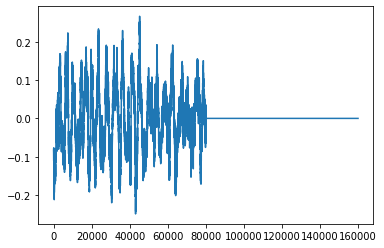

In [6]:
import IPython.display as ipd
import matplotlib.pyplot as plt

z = data[100]
plt.plot(z)
plt.show()
ipd.Audio(z, rate=32000)

In [49]:
emb = []
for x in data:
    pred = model(torch.from_numpy(x)).detach()
    emb.append(pred)
print(emb[:5])

[tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.,

In [54]:
emb[100][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])